In [ ]:
df_battles <- read.csv("https://raw.githubusercontent.com/nupur1492/RProjects/master/GameOfThrones/battles.csv")
str(df_battles)

head(df_battles)

library(ggplot2)

'data.frame':	38 obs. of  25 variables:
 $ name              : chr  "Battle of the Golden Tooth" "Battle at the Mummer's Ford" "Battle of Riverrun" "Battle of the Green Fork" ...
 $ year              : int  298 298 298 298 298 298 298 299 299 299 ...
 $ battle_number     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ attacker_king     : chr  "Joffrey/Tommen Baratheon" "Joffrey/Tommen Baratheon" "Joffrey/Tommen Baratheon" "Robb Stark" ...
 $ defender_king     : chr  "Robb Stark" "Robb Stark" "Robb Stark" "Joffrey/Tommen Baratheon" ...
 $ attacker_1        : chr  "Lannister" "Lannister" "Lannister" "Stark" ...
 $ attacker_2        : chr  "" "" "" "" ...
 $ attacker_3        : chr  "" "" "" "" ...
 $ attacker_4        : chr  "" "" "" "" ...
 $ defender_1        : chr  "Tully" "Baratheon" "Tully" "Lannister" ...
 $ defender_2        : chr  "" "" "" "" ...
 $ defender_3        : logi  NA NA NA NA NA NA ...
 $ defender_4        : logi  NA NA NA NA NA NA ...
 $ attacker_outcome  : chr  "win" "win" "win" 

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,⋯,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>
1,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,,,,Tully,⋯,1,0,15000,4000,Jaime Lannister,"Clement Piper, Vance",1,Golden Tooth,The Westerlands,
2,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,,,,Baratheon,⋯,1,0,NA,120,Gregor Clegane,Beric Dondarrion,1,Mummer's Ford,The Riverlands,
3,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,,,,Tully,⋯,0,1,15000,10000,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1,Riverrun,The Riverlands,
4,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,,,,Lannister,⋯,1,1,18000,20000,"Roose Bolton, Wylis Manderly, Medger Cerwyn, Harrion Karstark, Halys Hornwood","Tywin Lannister, Gregor Clegane, Kevan Lannister, Addam Marbrand",1,Green Fork,The Riverlands,
5,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,,,Lannister,⋯,1,1,1875,6000,"Robb Stark, Brynden Tully",Jaime Lannister,1,Whispering Wood,The Riverlands,
6,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,,,Lannister,⋯,0,0,6000,12625,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1,Riverrun,The Riverlands,


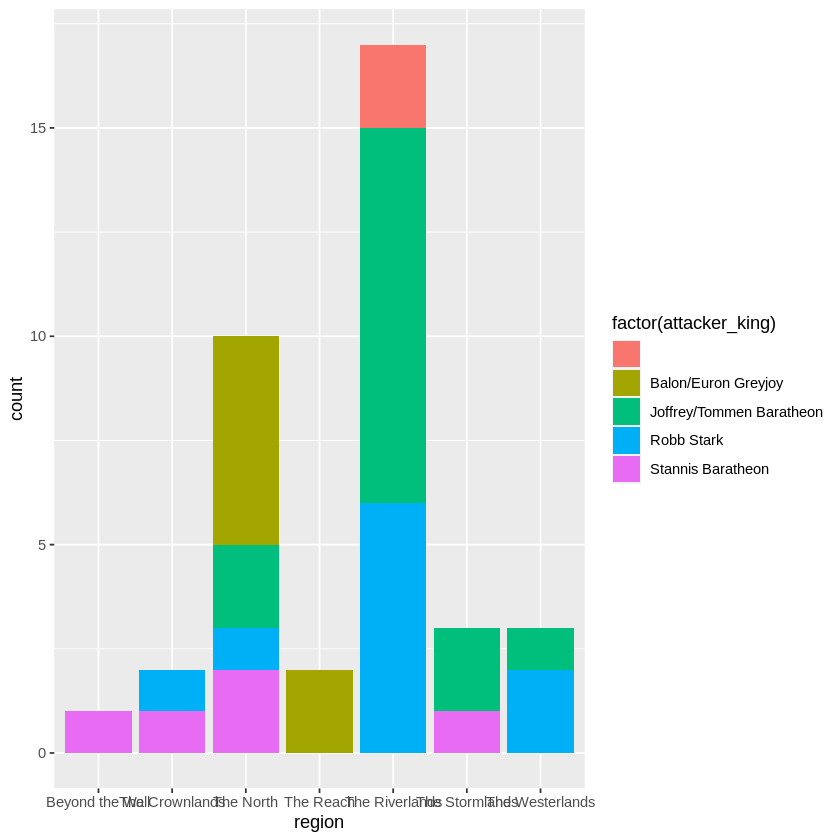

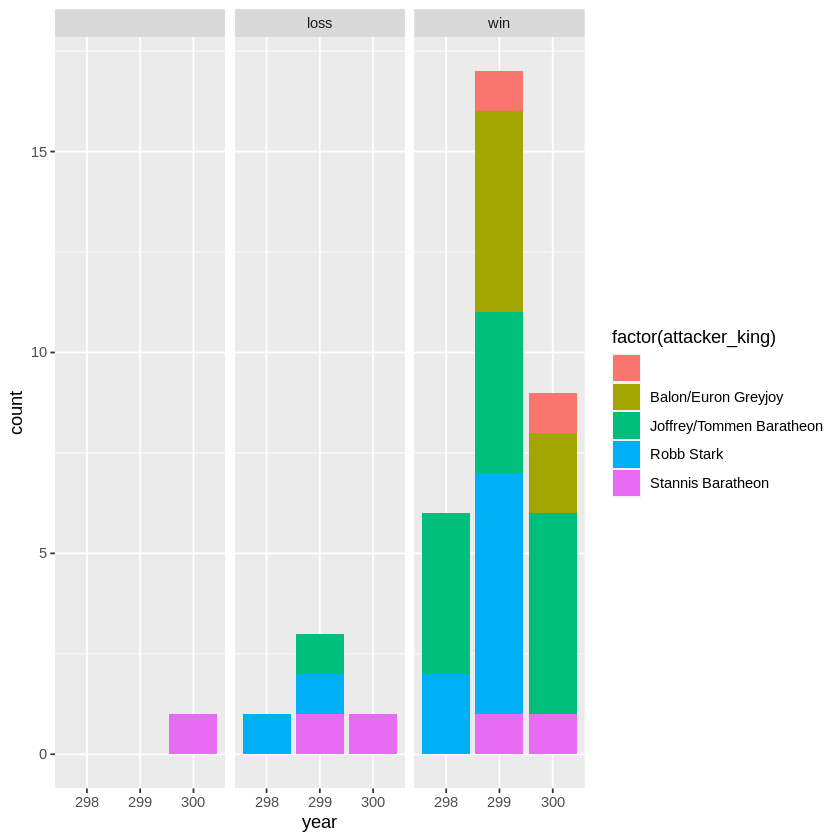

In [ ]:
#Which region had most battles?
ggplot(aes(x = region), data = df_battles,color = attacker_king)+
  geom_bar(aes(fill = factor(attacker_king)))

#Which year had most battles? Who was the attcker; who won?
df_battles$year <- as.factor(df_battles$year)
ggplot(aes(x = year), data = df_battles)+
  geom_bar(aes(fill = factor(attacker_king)))+
  facet_wrap(~attacker_outcome)

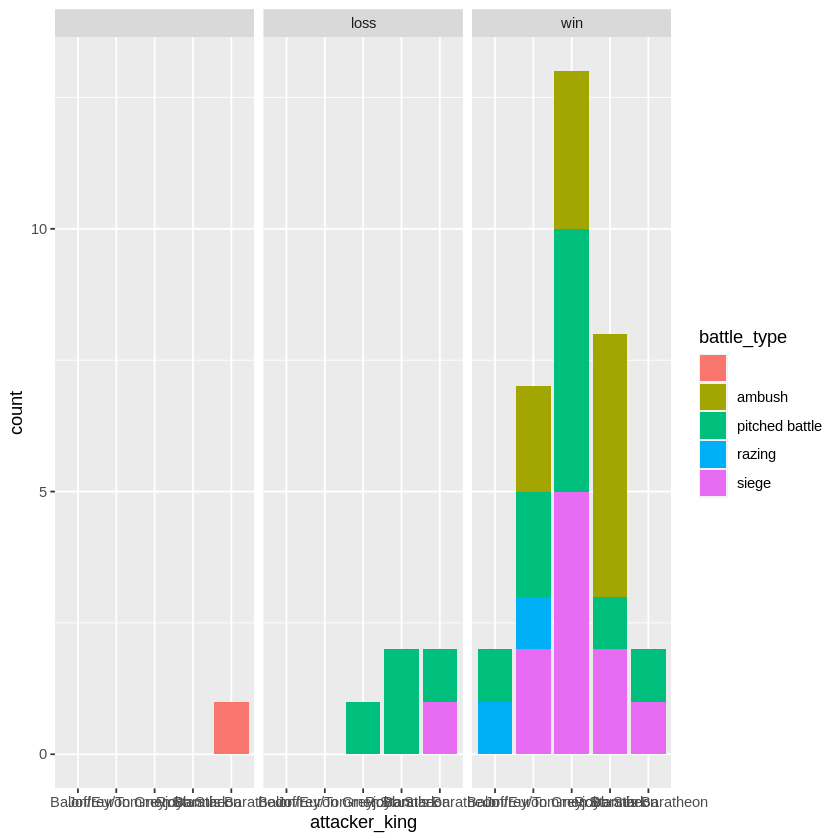

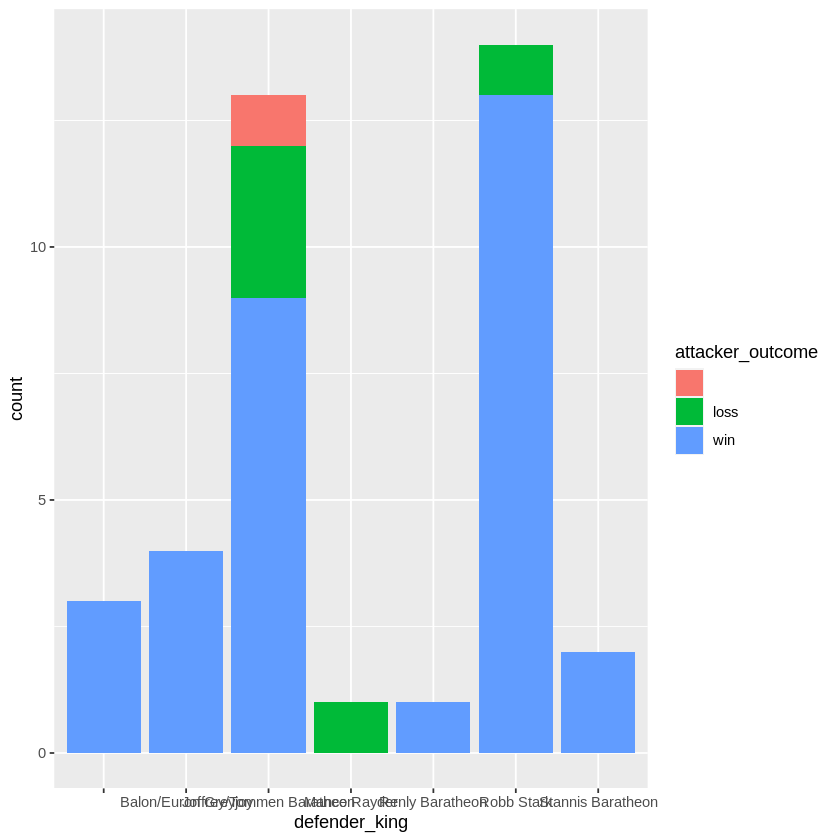

In [ ]:
# Most battles initiated by king? what was the outcome
df_battles_clean <- df_battles[!is.na(df_battles$attacker_outcome),]
ggplot(aes(x = attacker_king), data = df_battles[!is.na(df_battles$attacker_outcome),])+
  geom_bar(aes(fill = battle_type))+
  facet_wrap(~attacker_outcome)

#Most battles defended; what was the outcome?
ggplot(aes(x = defender_king), data = df_battles)+
  geom_bar(aes(fill = attacker_outcome))

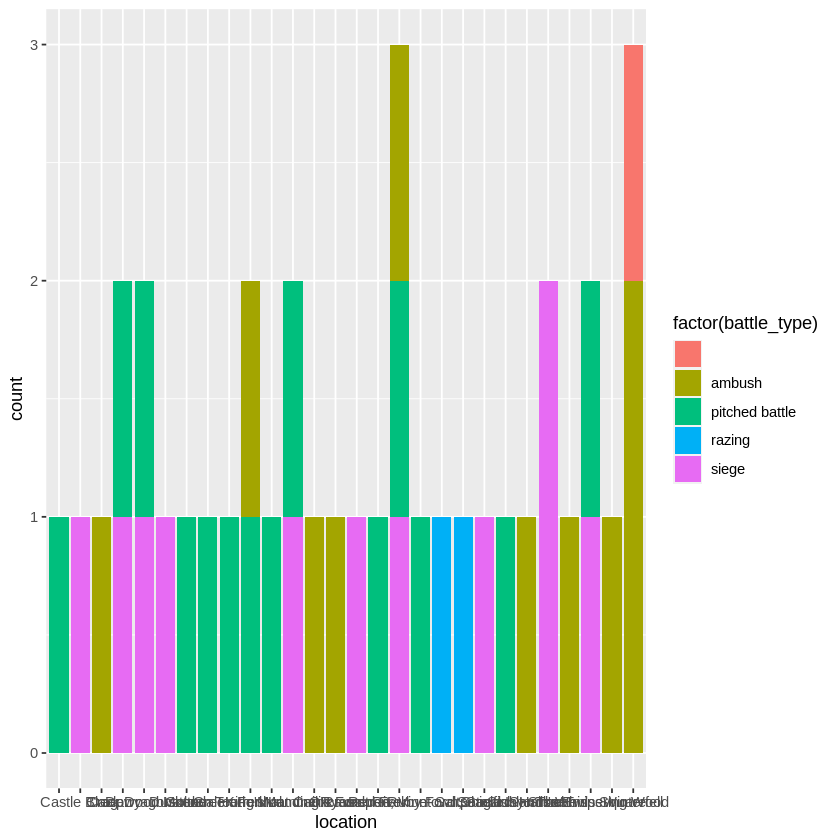

In [ ]:
# Which type of battle was most fought at what location?
ggplot(aes(x = location), data = df_battles)+
  geom_bar(aes(fill = factor(battle_type)))


# attacker size vs defender size; outcome of battle
df_battles_1 <- df_battles[!is.na(df_battles$attacker_size) 
                           & !is.na(df_battles$defender_size) 
                           & !is.na(df_battles$attacker_outcome),]

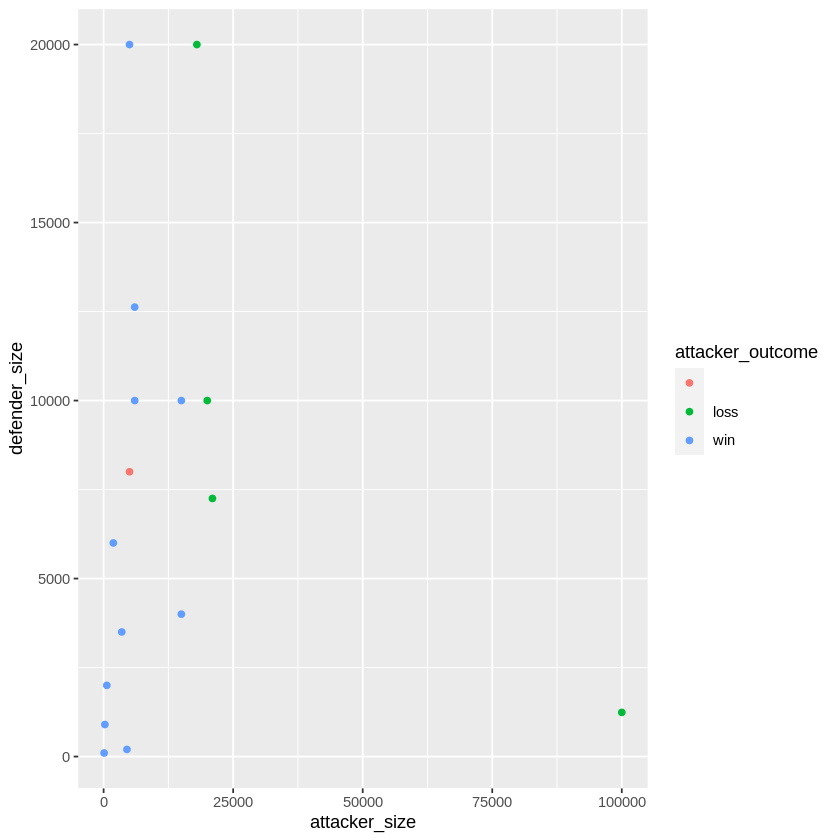

In [ ]:
ggplot(aes(x = attacker_size, y = defender_size), data = df_battles_1)+
  geom_point(aes(color = attacker_outcome))

Warning message:
“Removed 15 rows containing missing values (geom_point).”


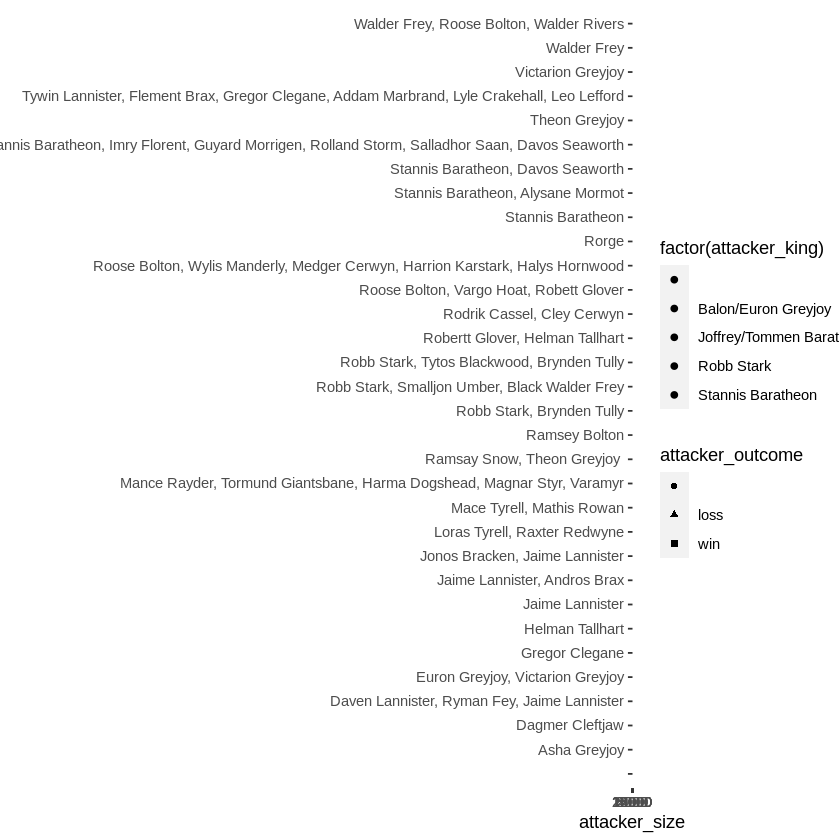

In [ ]:
#which commander was most successfull
ggplot(aes(x = attacker_size, y = attacker_commander), data = df_battles)+
  geom_point(stat = "identity", aes(fill = factor(attacker_king), shape = attacker_outcome))+
  scale_x_continuous(limits = c(0,22000), breaks = seq(0,22000,2000))

In [ ]:
# #learning plotly
# install.packages("plotly")
# library(plotly)


# p1 <- plot_ly(df_battles, x = region)
# p1

# p2 <- plot_ly(df_battles, x = region, type = "bar")
# p2

# p3 <- plot_ly(df_battles, x = region, mode = "markers")
# p3

# p4 <- plot_ly(df_battles, x = region, mode = "markers", color = attacker_outcome)
# p4

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored